# CNN Tutorial

In [86]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.0.0-rc0'

In [2]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [87]:
print("X_test shape:", X_test.shape)

X_test shape: (10000, 32, 32, 3)


In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

0


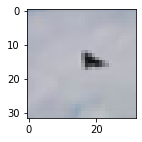

1


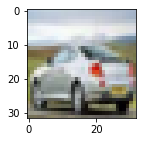

2


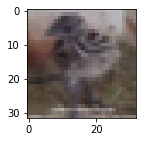

3


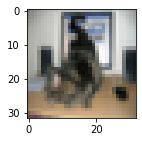

4


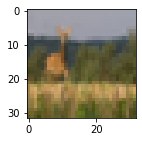

5


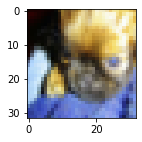

6


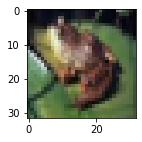

7


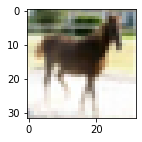

8


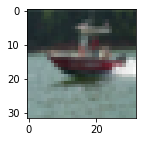

9


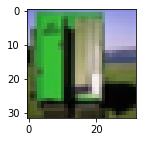

In [16]:
flag = 0
while(flag<10):
    ran_num = random.randint(0,49999)
    if (y_train[ran_num]==flag):
        print(flag)
        plt.figure(figsize=(2,2))
        plt.imshow(X_train[ran_num])
        plt.show()
        flag = flag+1

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", 
                                 activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [44]:
model.fit(X_train, y_train, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - 263s 5ms/sample - loss: 1.1812 - sparse_categorical_accuracy: 0.5781


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

In [46]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6559000015258789


# ------------------------------------------------------------------------ #

In [40]:
inputs = tf.keras.Input(shape=(32, 32, 3,), name="input")
Model = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(inputs)
Model = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(Model)
Model = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')(Model)
Model = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(Model)
Model = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(Model)
Model = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')(Model)
Model = tf.keras.layers.Flatten()(Model)
Model = tf.keras.layers.Dense(units=128, activation='relu')(Model)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(Model)
Model = tf.keras.Model(inputs, outputs)


In [41]:
Model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv (Conv2D)                (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0   

In [47]:
Model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [48]:
Model.fit(X_train, y_train, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - 275s 5ms/sample - loss: 1.3796 - sparse_categorical_accuracy: 0.5023


In [ ]:
test_loss, test_accuracy = Model.evaluate(X_test, y_test)

In [50]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6176999807357788


In [88]:
test_img = random.randint(0,9999)
test_data = tf.expand_dims(X_test[test_img], axis=0)
predict = Model.predict(test_data)

In [89]:
print("test_img:", test_img)
print("predict: ", predict)

test_img: 2645
predict:  [[4.6436876e-04 9.9714285e-01 8.1033313e-06 1.4683484e-05 7.1979580e-06
  1.6421410e-06 3.0346211e-05 4.5400222e-07 2.9922428e-04 2.0310357e-03]]


In [90]:
max_val = tf.math.reduce_max(predict)
max_arg = tf.math.argmax(predict[0])
print("show max value: ", max_val)
print("show max value place: ", max_arg)

show max value:  tf.Tensor(0.99714285, shape=(), dtype=float32)
show max value place:  tf.Tensor(1, shape=(), dtype=int64)


category: automobile


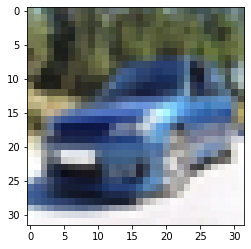

In [92]:
print("category:", class_names[max_arg])
plt.imshow(X_test[test_img])